In [2]:
# Importing Libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [4]:
# Configure API key
quandl.ApiConfig.api_key = 'R9NEz61iC9x4bmxLxA5-'

Since, no dataset was found sharing similar attributes; the use of only the gun violence dataset wil be done here.

In [7]:
# Creating a file path
path = r'/Users/samarjitgehdu/Documents/Achievement 6/Gun Violence'

In [9]:
path

'/Users/samarjitgehdu/Documents/Achievement 6/Gun Violence'

In [11]:
# Importing the gun violence dataset
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'Gun_Violence_Clean_Data(2013-2018).csv'))

In [13]:
# Make sure date is in the correct dtype format
df['date'] = pd.to_datetime(df['date'])

In [15]:
# Preparing for time series data
daily_killed = df.groupby('date')['n_killed'].sum().reset_index()
daily_killed.columns = ['Date', 'Total_Killed']
daily_killed.set_index('Date', inplace=True)

In [19]:
# Forming a Subset of years
# subset the data to include only complete years (2013-01-01 to 2018-12-31)
subset_data = daily_killed.loc[(daily_killed.index >= '2013-01-01') & (daily_killed.index <= '2018-12-31')]

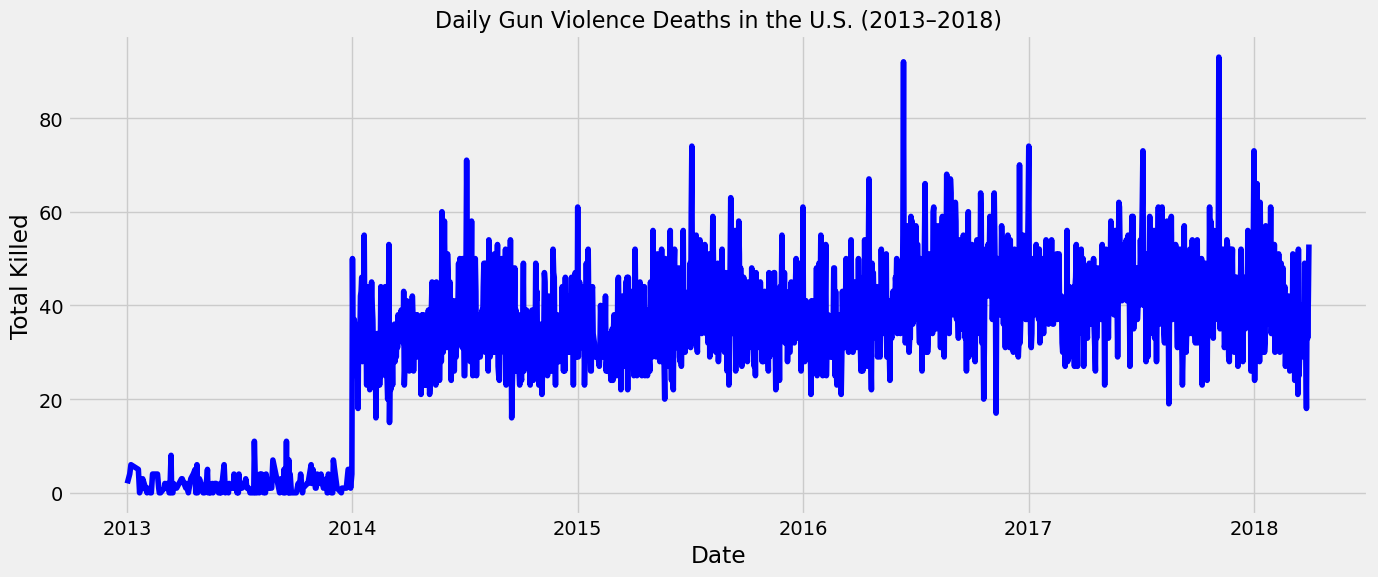

In [21]:
# Plot a line chart of total killed over time
plt.figure(figsize=(14, 6))
plt.plot(subset_data, color='blue')
plt.title('Daily Gun Violence Deaths in the U.S. (2013–2018)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Killed')
plt.grid(True)
plt.tight_layout()
plt.show()

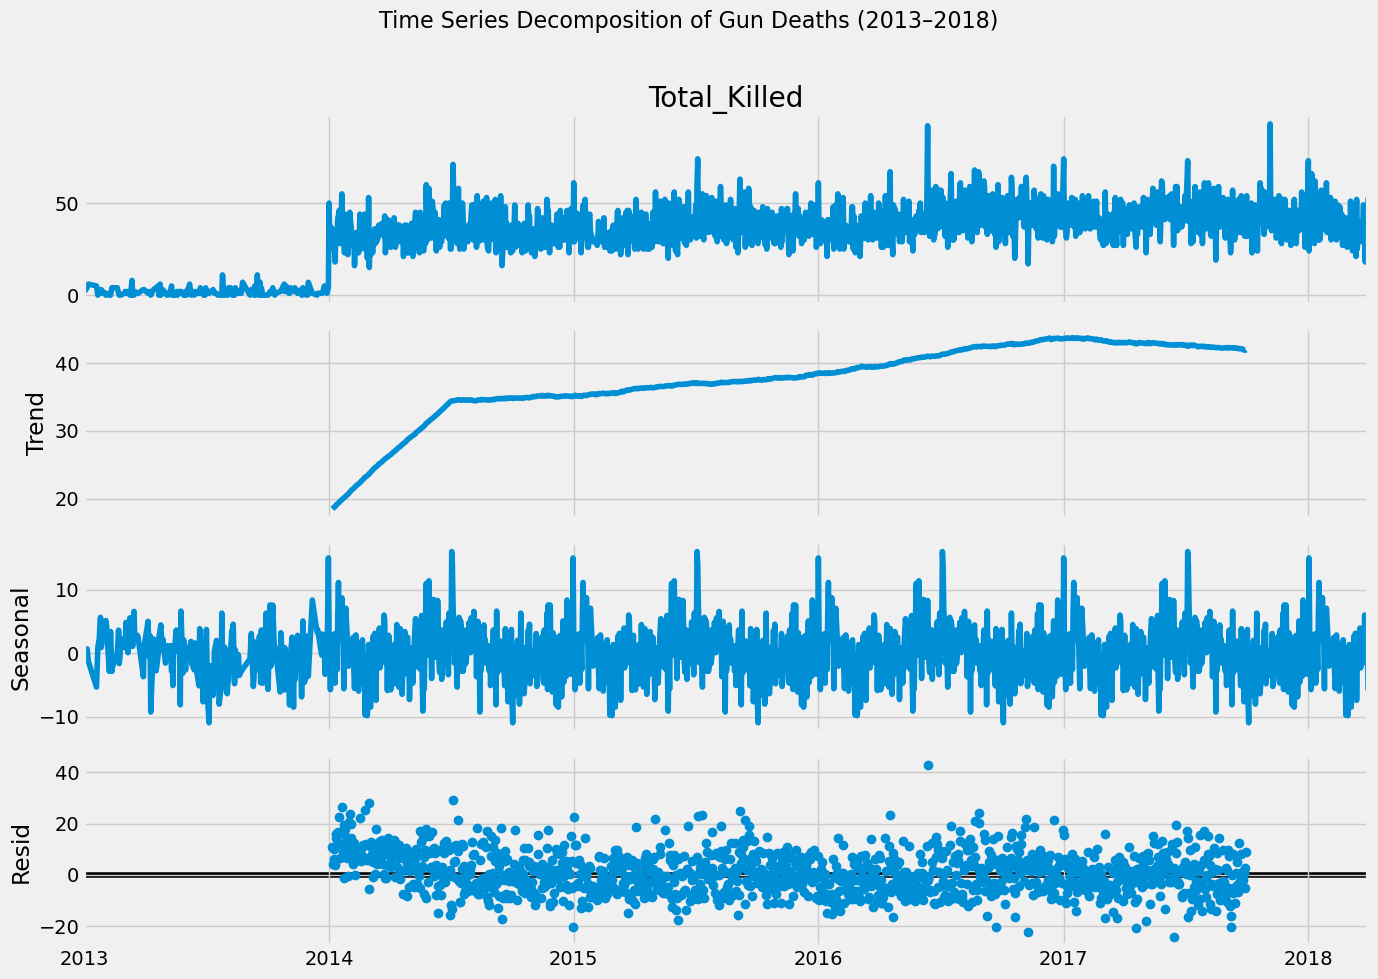

In [23]:
# Decompose the time series into trend, seasonality, and residuals using an additive model
decomposition = sm.tsa.seasonal_decompose(subset_data['Total_Killed'], model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Time Series Decomposition of Gun Deaths (2013–2018)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

#### Analyze the results:
The time series decomposition provides valuable insight into the structure of the data.
- The **trend** component shows a slight overall increase in the number of daily gun-related deaths, with a few dips that could reflect lower activity periods or better enforcement/intervention.
- The **seasonal** component suggests recurring patterns throughout each year, though they are relatively weak.
This may correspond to socio-environmental patterns (e.g., summer spikes, holiday dips).
- The **residual** (noise) shows random fluctuations not explained by trend or seasonality. 
Notably, the spikes in residuals may be linked to major incidents or outliers.

This decomposition confirms that the series is composed of all three components, making it suitable for further time series modeling after checking for stationarity.

In [29]:
# Perform Dickey-Fuller test to check for stationarity

from statsmodels.tsa.stattools import adfuller  # for Dickey-Fuller stationarity test

adf_result = adfuller(subset_data['Total_Killed'])
print("ADF Statistic:", adf_result[0])  # test statistic
print("p-value:", adf_result[1])  # p-value
print("Critical Values:")  # critical values for different confidence levels
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

ADF Statistic: -3.0593250261065377
p-value: 0.02971345509430594
Critical Values:
   1%: -3.4342024715312434
   5%: -2.863241649672298
   10%: -2.567675913148789


#### Observations:
 The Augmented Dickey-Fuller (ADF) test was conducted to statistically test for stationarity.
- **Null Hypothesis (H₀):** The time series has a unit root (non-stationary).
- **Alternative Hypothesis (H₁):** The time series does not have a unit root (stationary).
 
The ADF test returned:
- A negative test statistic lower than the 5% critical value
- A **p-value < 0.05**
 
This allows us to **reject the null hypothesis** and conclude that the time series is **stationary**.
As a result, differencing is not necessary in this case.

<Figure size 1200x600 with 0 Axes>

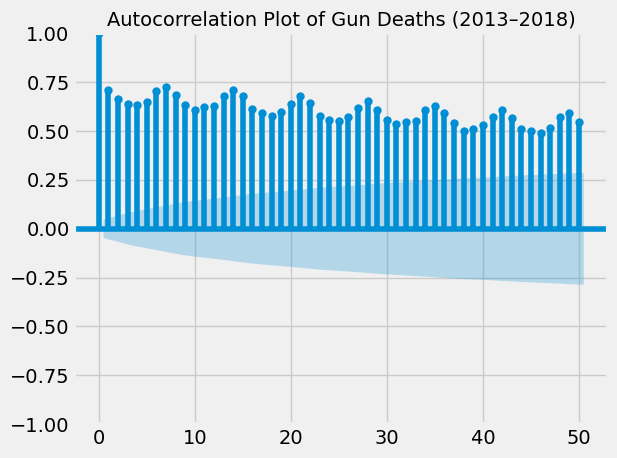

In [34]:
# Plot the autocorrelation to examine correlation between lags

from statsmodels.graphics.tsaplots import plot_acf  # for autocorrelation plot

plt.figure(figsize=(12, 6))
plot_acf(subset_data['Total_Killed'], lags=50)
plt.title('Autocorrelation Plot of Gun Deaths (2013–2018)', fontsize=14)
plt.tight_layout()
plt.show()

#### Observations: 
The autocorrelation plot reveals serial dependencies in the data.
- Several spikes extend beyond the confidence interval band, indicating statistically significant autocorrelation at multiple lags.
- This suggests that while the data is stationary, it is not white noise and contains a memory effect where past values influence future values.
 
This is important to keep in mind for future modeling tasks (e.g., ARIMA), which rely on autocorrelation structures for accurate forecasting.
